In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [3]:
df=pd.read_csv("F:\Cognifyz_intern_ship\Dataset.csv")
df.head(3)

<>:1: SyntaxWarning: invalid escape sequence '\C'
<>:1: SyntaxWarning: invalid escape sequence '\C'
C:\Users\Amin Moradpour\AppData\Local\Temp\ipykernel_7700\4265741934.py:1: SyntaxWarning: invalid escape sequence '\C'
  df=pd.read_csv("F:\Cognifyz_intern_ship\Dataset.csv")


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270


In [4]:
print(df.columns)

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')


In [5]:
#Level 1 
#Task 1- Top Cuisines

In [6]:

top_cuisines=df['Cuisines'].value_counts().head(3)
print(top_cuisines)

Cuisines
North Indian             936
North Indian, Chinese    511
Chinese                  354
Name: count, dtype: int64


In [7]:
total_restauranets=len(df['Restaurant Name'])
cuisine_presentage=(top_cuisines/total_restauranets)*100
rounded_cuisine_presentage=round(cuisine_presentage,2)
print(rounded_cuisine_presentage)

Cuisines
North Indian             9.80
North Indian, Chinese    5.35
Chinese                  3.71
Name: count, dtype: float64


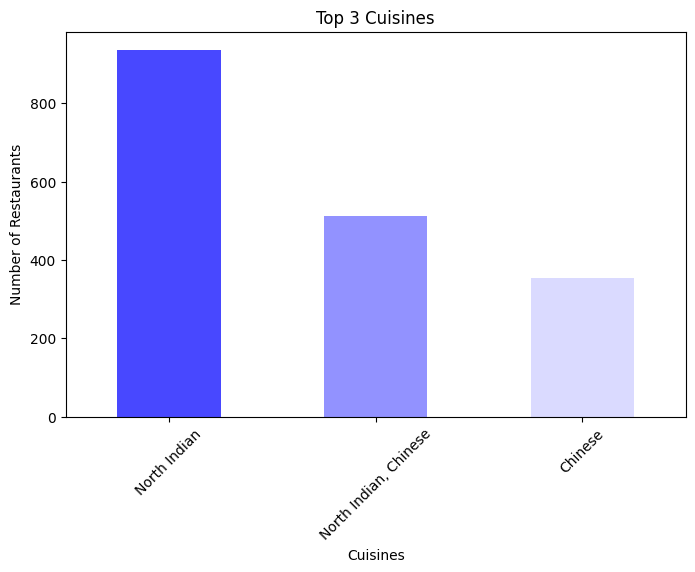

In [8]:
plt.figure(figsize=(8, 5)) 
colors= sns.color_palette('bwr', n_colors=len(top_cuisines)+3)
top_cuisines.plot(kind="bar", color=colors)  
plt.title("Top 3 Cuisines")
plt.xlabel("Cuisines")
plt.xticks(rotation=45)
plt.ylabel("Number of Restaurants")
plt.show()

In [9]:
#level 1 
#Task 2-City Analysis

In [10]:
top_city=df["City"].value_counts().idxmax()
print(f"The City With Most Restauranets is: {top_city}")

The City With Most Restauranets is: New Delhi


In [11]:
city_average_ratings=df.groupby("City")["Aggregate rating"].mean().sort_values(ascending=False)
print(city_average_ratings)

City
Inner City          4.900000
Quezon City         4.800000
Makati City         4.650000
Pasig City          4.633333
Mandaluyong City    4.625000
                      ...   
New Delhi           2.438845
Montville           2.400000
Mc Millan           2.400000
Noida               2.036204
Faridabad           1.866932
Name: Aggregate rating, Length: 141, dtype: float64


In [12]:
top_rated_city=city_average_ratings.idxmax()
print(f"City With Most Highest Average Rating is: {top_rated_city}")

City With Most Highest Average Rating is: Inner City


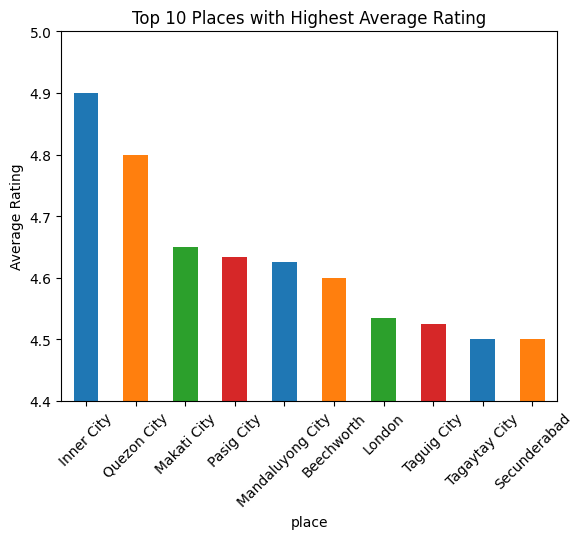

In [34]:
top_10_cities=city_average_ratings.head(10)
plt.figure(figure=(8,5))
colors= sns.color_palette('tab10', n_colors=len(top_cuisines)+1)
top_10_cities.plot(kind="bar",color=colors)
plt.title("Top 10 Places with Highest Average Rating")
plt.xlabel("place")
plt.xticks(rotation=45)
plt.ylim([4.4,5])
plt.ylabel("Average Rating")
plt.show()

In [14]:
#level 1 
#Task 3 - Price Range Distribution

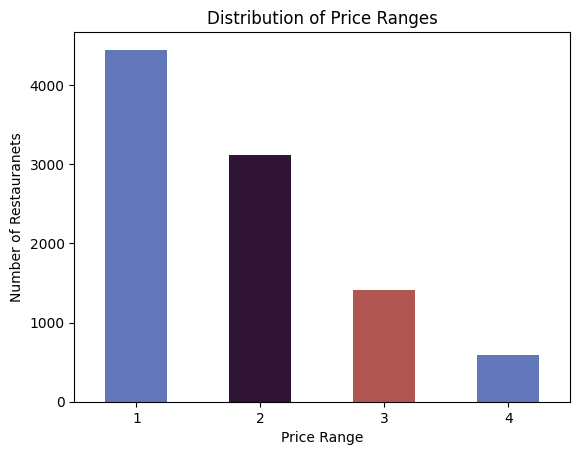

In [15]:
price_range_counts=df["Price range"].value_counts()
plt.figure(figure=(8,5))
colors= sns.color_palette('twilight', n_colors=len(top_cuisines))
price_range_counts.plot(kind='bar' ,color=colors)
plt.title("Distribution of Price Ranges")
plt.xlabel('Price Range')
plt.xticks(rotation=0)
plt.ylabel("Number of Restauranets")
plt.show()

In [16]:
price_range_percentage=(price_range_counts/total_restauranets)*100
round_price_range_percentage=round(price_range_percentage,2)
print(round_price_range_percentage)


Price range
1    46.53
2    32.59
3    14.74
4     6.14
Name: count, dtype: float64


In [17]:
#level 1 
#Task 4 - Online Delivery

In [18]:
online_delivery_counts=df["Has Online delivery"].value_counts()
online_delivery_percantage=(online_delivery_counts["Yes"]/total_restauranets)*100
print(f"Percentage of Restauranets  Offering Online Delivery:{online_delivery_percantage}")

Percentage of Restauranets  Offering Online Delivery:25.662234321013504


Has Online delivery
No     2.465296
Yes    3.248837
Name: Aggregate rating, dtype: float64


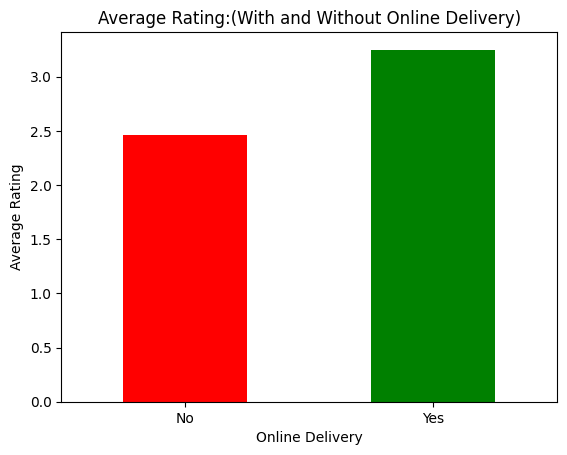

In [19]:
delivery_rating=df.groupby('Has Online delivery')["Aggregate rating"].mean()
print(delivery_rating)
plt.figure(figure=(8,5))
delivery_rating.plot(kind='bar',color=['red','green'])
plt.title("Average Rating:(With and Without Online Delivery)")
plt.xlabel("Online Delivery")
plt.xticks(rotation=0)
plt.ylabel("Average Rating")
plt.show()

In [20]:
#level 2 
#Task 1 - Restaurant Ratings

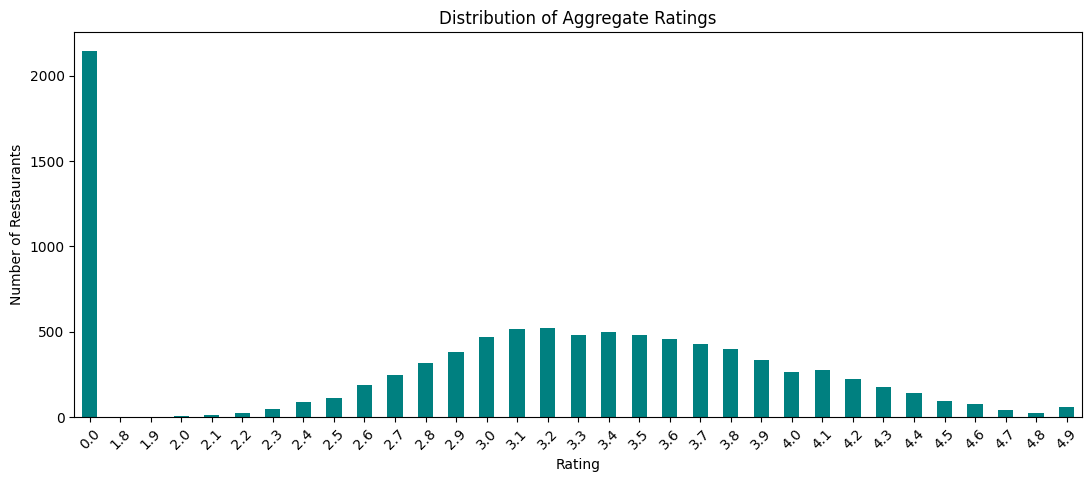

In [21]:
ratings_counts = df['Aggregate rating'].value_counts().sort_index()

plt.figure(figsize=(13, 5))
ratings_counts.plot(kind='bar', color='teal')
plt.title('Distribution of Aggregate Ratings')
plt.xlabel('Rating')
plt.xticks(rotation=45)
plt.ylabel('Number of Restaurants')
plt.show()

In [22]:
rating_ranges = pd.cut(df['Aggregate rating'], bins=[0, 2, 3, 4, 5])
rating_range_counts = rating_ranges.value_counts()

print(f"Most common rating range: {rating_range_counts.idxmax()}")

Most common rating range: (3, 4]


In [23]:
average_votes = df['Votes'].mean()
print(f"Average number of votes: {average_votes:.2f}")

Average number of votes: 156.91


In [24]:
#level 2
#Task 2 - Cuisine Combination

In [25]:
cuisine_combinations = df['Cuisines'].str.split(',').explode().value_counts().head(10)
print(cuisine_combinations)

Cuisines
North Indian     2992
 Chinese         1880
 Fast Food       1314
 North Indian     968
Chinese           855
 Mughlai          780
Fast Food         672
Bakery            621
Cafe              617
 Italian          530
Name: count, dtype: int64


Cuisines
Italian, Deli               4.9
Hawaiian, Seafood           4.9
American, Sandwich, Tea     4.9
Continental, Indian         4.9
European, Asian, Indian     4.9
European, Contemporary      4.9
European, German            4.9
BBQ, Breakfast, Southern    4.9
American, Coffee and Tea    4.9
Sunda, Indonesian           4.9
Name: Aggregate rating, dtype: float64


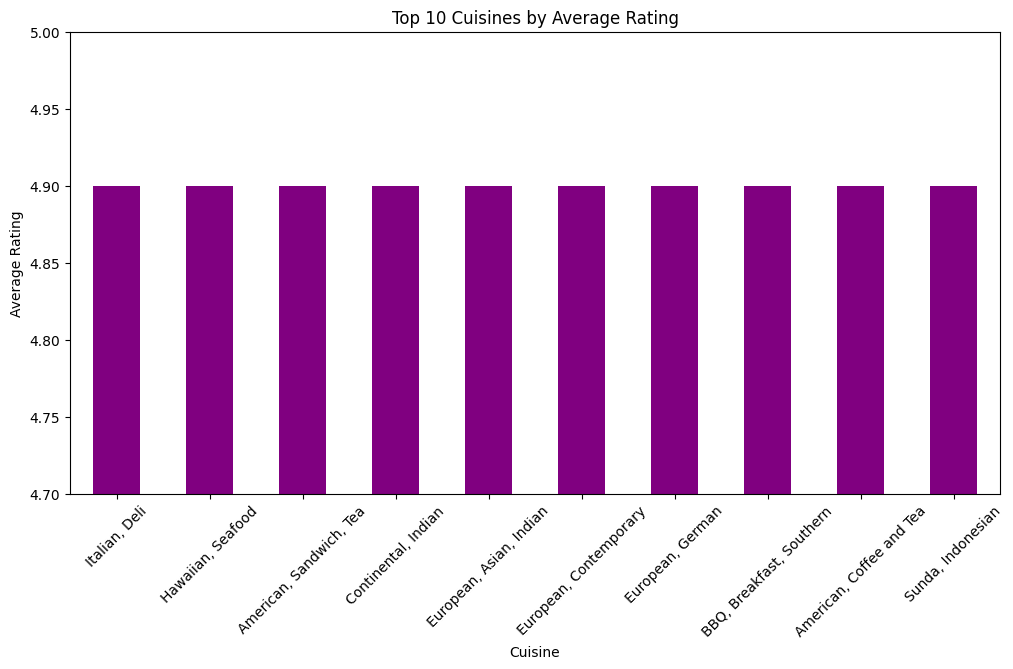

In [26]:
cuisine_rating_avg = df.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False)
print(cuisine_rating_avg.head(10))

plt.figure(figsize=(12, 6))
cuisine_rating_avg.head(10).plot(kind='bar', color='purple')
plt.title('Top 10 Cuisines by Average Rating')
plt.xlabel('Cuisine')
plt.xticks(rotation=45)
plt.ylim([4.7,5])
plt.ylabel('Average Rating')
plt.show()

In [27]:
#level 2
#Task 3 - Geographic Analysis

<Figure size 2000x1500 with 0 Axes>

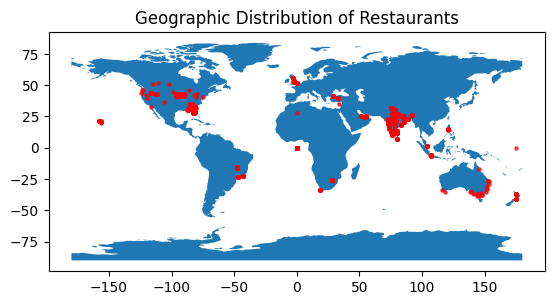

In [28]:
import geopandas as gpd
from shapely.geometry import Point
import geodatasets

geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry)
world = gpd.read_file(geodatasets.get_path("naturalearth.land"))
plt.figure(figsize=(20, 15))
ax = world.plot()
gdf.plot(ax=ax, color='red', markersize=5, alpha=0.7)
plt.title('Geographic Distribution of Restaurants')
plt.show()


In [29]:
#level 2 
#Task 4 - Restaurant Chains

In [30]:
restaurant_counts = df['Restaurant Name'].value_counts()
restaurant_chains = restaurant_counts[restaurant_counts > 1]
print(f"Restaurant Chains: \n{restaurant_chains}")

Restaurant Chains: 
Restaurant Name
Cafe Coffee Day       83
Domino's Pizza        79
Subway                63
Green Chick Chop      51
McDonald's            48
                      ..
Town Hall              2
Halki Aanch            2
Snack Junction         2
Delhi Biryani Hut      2
Beliram Degchiwala     2
Name: count, Length: 734, dtype: int64


Restaurant Name
#45                     3.6
#Dilliwaala6            3.7
#InstaFreeze            0.0
#OFF Campus             3.7
#Urban Caf��            3.3
                       ... 
t Lounge by Dilmah      3.6
tashas                  4.1
wagamama                3.7
{Niche} - Cafe & Bar    4.1
�ukura��a Sofras۱       4.4
Name: Aggregate rating, Length: 7446, dtype: float64


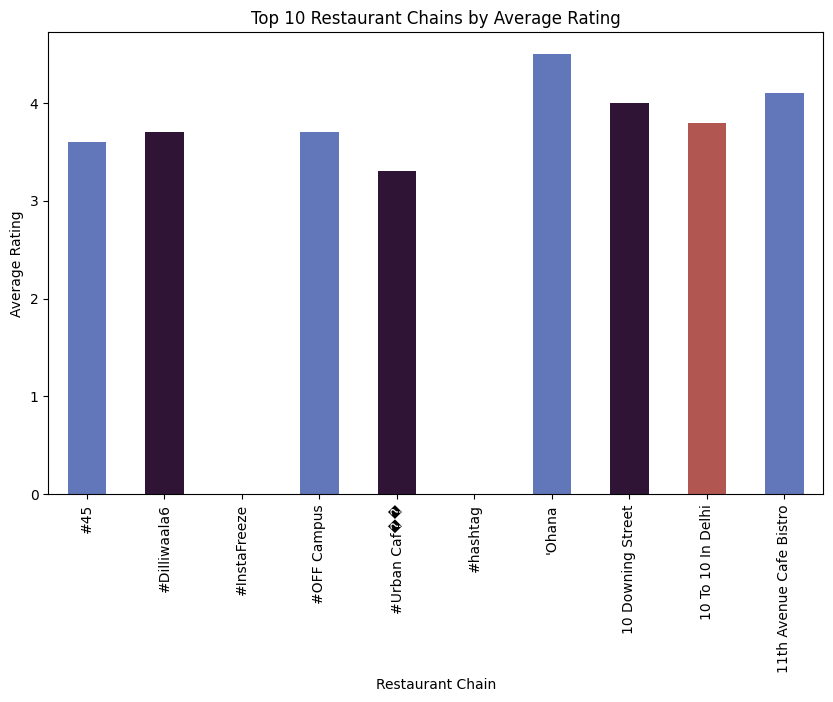

In [31]:
chain_ratings = df.groupby('Restaurant Name')['Aggregate rating'].mean()
print(chain_ratings)
colors= sns.color_palette('twilight', n_colors=len(top_cuisines))
plt.figure(figsize=(10, 6))
chain_ratings.head(10).plot(kind='bar', color=colors)
plt.title('Top 10 Restaurant Chains by Average Rating')
plt.xlabel('Restaurant Chain')
plt.ylabel('Average Rating')
plt.show()

In [32]:
#level 3
#Task 1 - Restaurant Reviews

In [33]:
import spacy
from collections import Counter
import string

nlp = spacy.load('en_core_web_sm')
reviews = df['Rating text'].dropna().str.lower()
all_words = []
for review in reviews:
    doc = nlp(review)
    all_words.extend([token.text for token in doc if not token.is_stop and not token.is_punct])

word_freq = Counter(all_words)
print("Most common words:", word_freq.most_common(20))

KeyboardInterrupt: 

In [ ]:
df['Review Length'] = df['Rating text'].dropna().apply(lambda x: len(x.split()))
average_review_length = df['Review Length'].mean()
print(f"Average review length: {average_review_length:.2f} words")

Average review length: 1.34 words


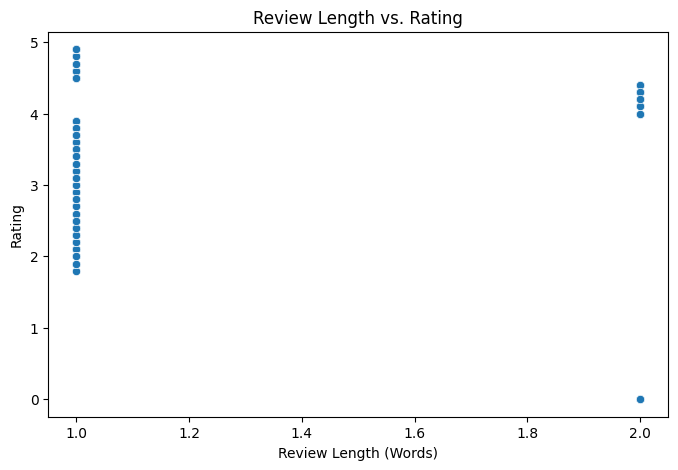

In [ ]:
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Review Length'], y=df['Aggregate rating'])
plt.title('Review Length vs. Rating')
plt.xlabel('Review Length (Words)')
plt.ylabel('Rating')
plt.show()

In [ ]:
#level 3 
#Task 2 - Votes Analysis

In [ ]:
highest_votes = df[['Restaurant Name', 'Votes']].sort_values(by='Votes', ascending=False).head(5)
lowest_votes = df[['Restaurant Name', 'Votes']].sort_values(by='Votes', ascending=True).head(5)

print("Top 5 Restaurants with Highest Votes:\n", highest_votes)
print("Top 5 Restaurants with Lowest Votes:\n", lowest_votes)


Top 5 Restaurants with Highest Votes:
                 Restaurant Name  Votes
728                        Toit  10934
735                    Truffles   9667
3994           Hauz Khas Social   7931
2412                  Peter Cat   7574
739   AB's - Absolute Barbecues   6907
Top 5 Restaurants with Lowest Votes:
                  Restaurant Name  Votes
5799         Khalsa Eating Point      0
7411   Radha Swami Chaat Bhandar      0
7414  Ram Ram Ji Kachori Bhandar      0
7415          Rana's Food Corner      0
7416         Sanjay Chicken Shop      0


Correlation between votes and rating: 0.31


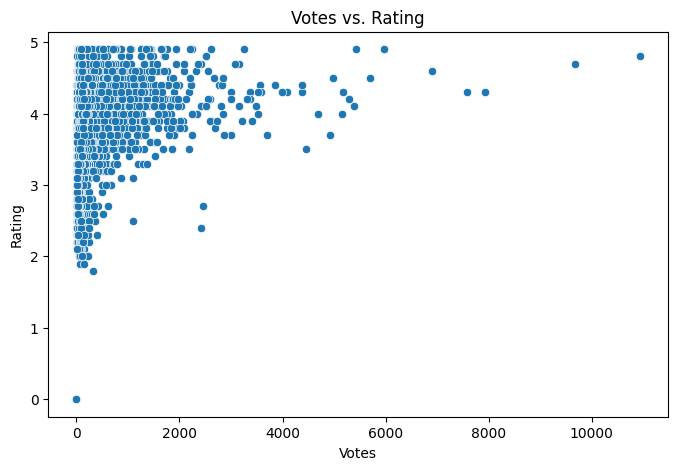

In [ ]:
import scipy.stats as stats

correlation, p_value = stats.pearsonr(df['Votes'], df['Aggregate rating'])
print(f"Correlation between votes and rating: {correlation:.2f}")

plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Votes'], y=df['Aggregate rating'])
plt.title('Votes vs. Rating')
plt.xlabel('Votes')
plt.ylabel('Rating')
plt.show()

In [ ]:
#level 3 
#Task 3 - Price Range vs. Online Delivery and Table Booking

In [ ]:
price_delivery_table = df.groupby('Price range')[['Has Online delivery', 'Has Table booking']].value_counts().unstack()
print(price_delivery_table)

Has Table booking                    No    Yes
Price range Has Online delivery               
1           No                   3743.0    NaN
            Yes                   700.0    1.0
2           No                   1711.0  116.0
            Yes                  1163.0  123.0
3           No                    624.0  373.0
            Yes                   140.0  271.0
4           No                    299.0  234.0
            Yes                    13.0   40.0


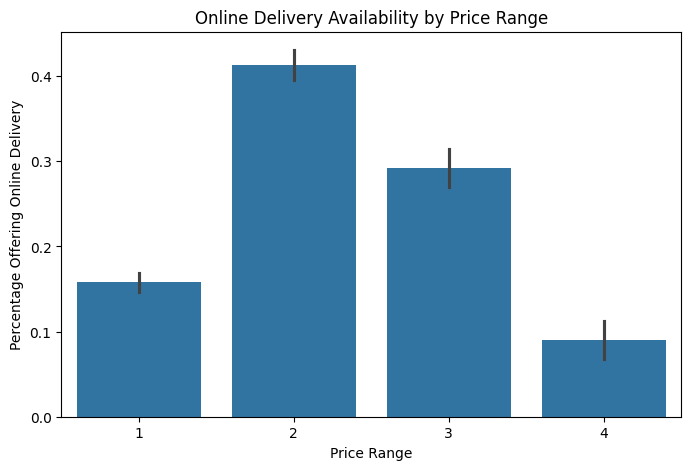

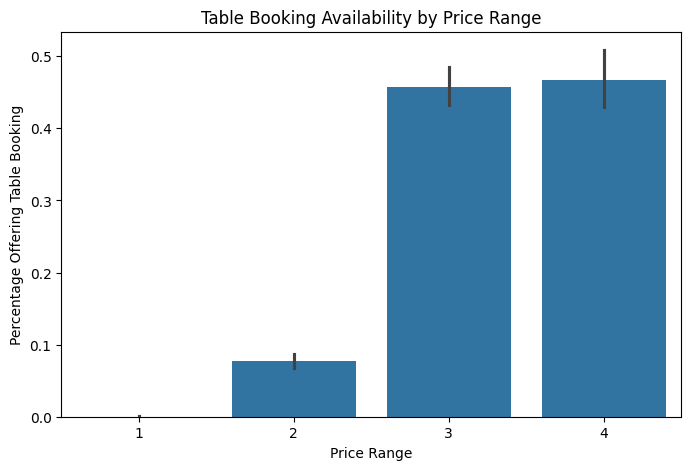

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(x=df['Price range'], y=df['Has Online delivery'].apply(lambda x: 1 if x == 'Yes' else 0))
plt.title('Online Delivery Availability by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Percentage Offering Online Delivery')
plt.show()

plt.figure(figsize=(8, 5))
colors= sns.color_palette('tab10', n_colors=len(top_cuisines))
sns.barplot(x=df['Price range'], y=df['Has Table booking'].apply(lambda x: 1 if x == 'Yes' else 0))
plt.title('Table Booking Availability by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Percentage Offering Table Booking')
plt.show()